In [29]:
from sklearn.datasets import load_iris
import pandas as pd

In [30]:
iris = load_iris()

# 数据构成
- data
- feature_names
- target
- target_names

In [31]:
columns = ['l1', 'l2' ,  'l3', 'l4']
df = pd.DataFrame(data = iris.data, columns = columns)
df.head()

,l1,l2,l3,l4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
df['label'] = iris.target

In [33]:
def name_for_target(target):
    num = len(iris.target_names)
    if target < num:
        return iris.target_names[target]
    else:
        return np.nan

In [34]:
df['name'] = list(map(name_for_target, iris.target)) 
df.head()

,l1,l2,l3,l4,label,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
df.name.value_counts()

virginica     50
setosa        50
versicolor    50
Name: name, dtype: int64

# 图形化分析

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib notebook

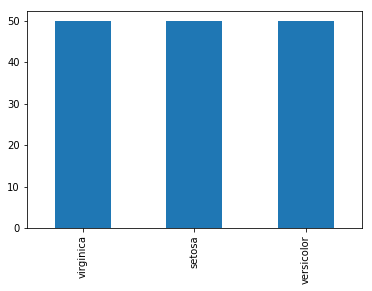

In [37]:
df.name.value_counts().plot(kind='bar')

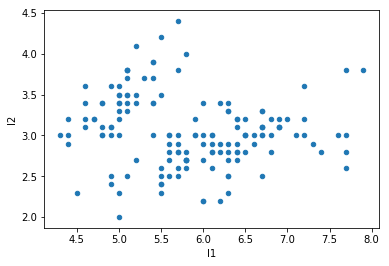

In [44]:
df.plot(kind = 'scatter', x ='l1', y = 'l2' )

In [39]:
import seaborn as sns

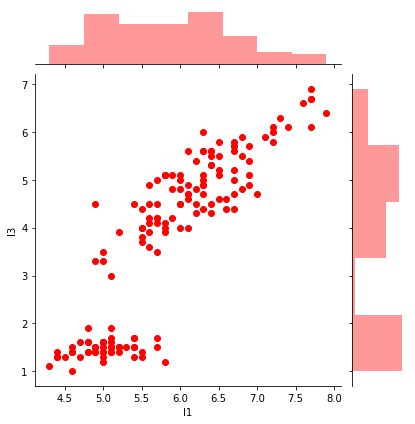

In [40]:
sns.jointplot(x="l1", y="l3", data=df, color='r')

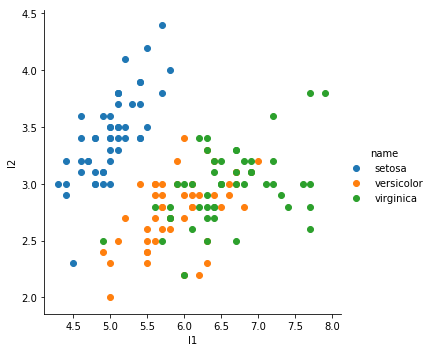

In [41]:
# 我们将使用seaborn的FacetGrid来为散点图上色
sns.FacetGrid(df, hue = 'name', height = 5.0).map(plt.scatter, 'l1', 'l2').add_legend()

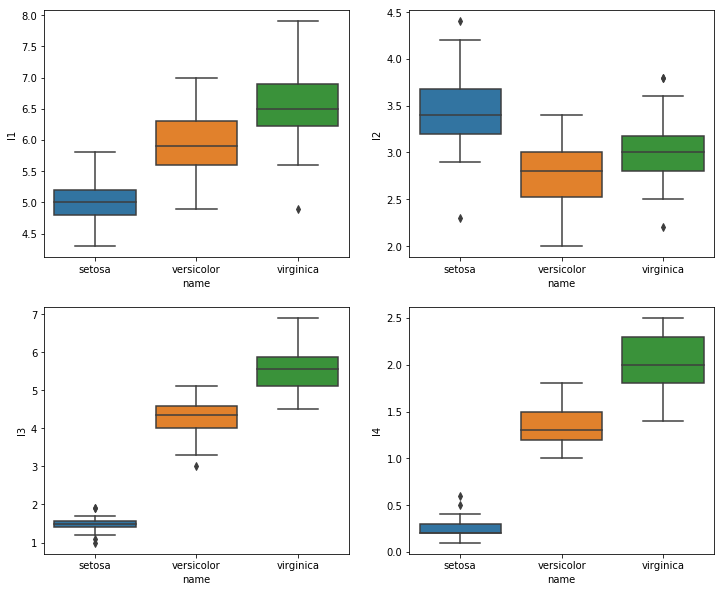

In [48]:
# 我们可以通过一个箱形图来查看seaborn的单独的一个特征


plt.figure(figsize = (12, 10))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)
ax3 = plt.subplot(2,2,3)
ax4 = plt.subplot(2,2,4)
sns.boxplot(x="name", y="l1", data=df, ax=ax1)
sns.boxplot(x="name", y="l2", data=df, ax=ax2)
sns.boxplot(x="name", y="l3", data=df, ax=ax3)
sns.boxplot(x="name", y="l4", data=df, ax=ax4)

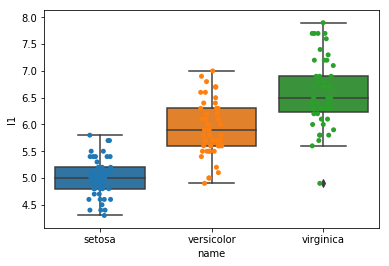

In [54]:
# 我们可以通过用seaborn的striplot添加单独的点来扩展上图
# 
# 我们将使用jitter=True,这样所有的点都不会落在物种的单条垂直线上
#
# 每次将产生的轴作为ax，每次都会导致结果图显示在前面的axes上
# ax = 
sns.boxplot(x="name",  y="l1", data=df)
sns.stripplot(x="name", y="l1", data=df, jitter=True, edgecolor="gray")

# ax = sns.boxplot(x="name",  y="l1", data=df)
# ax = sns.stripplot(x="name", y="l1", data=df, jitter=True, edgecolor="gray")

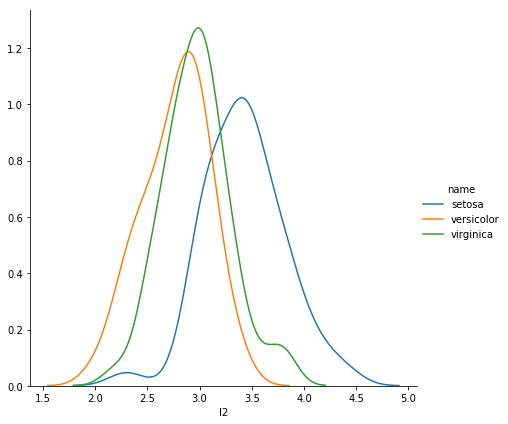

In [53]:
# 最后一个用于研究单变量关系的seaborn plot是kdeplot，它创建并可视化了底层特性的内核密度估计
sns.FacetGrid(df, hue="name", height=6) \
   .map(sns.kdeplot, "l2") \
   .add_legend()

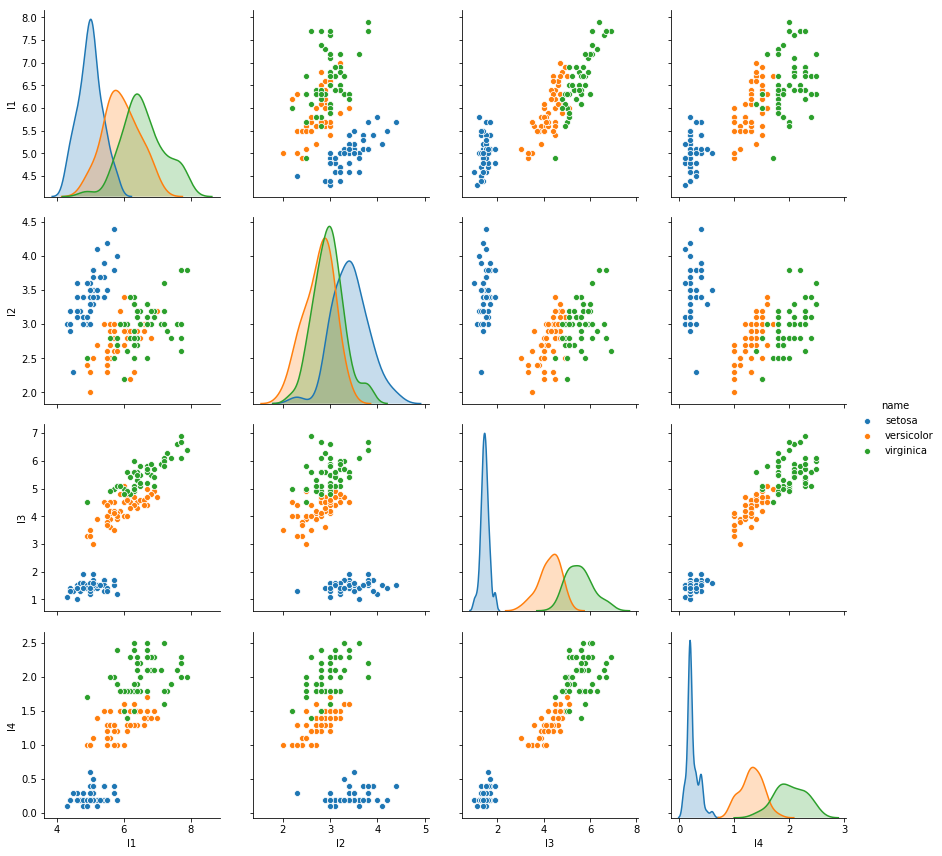

In [58]:
sns.pairplot(df.drop(['label'], axis = 1), hue = 'name', height = 3,  diag_kind = 'kde')